In [1]:
import pandas as pd
data = pd.read_excel(r'D:\python\November 2024.xlsx')

data.head(10)

C:\Users\City Computer\AppData\Roaming\Python\Python314\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Plant Name,Updated Time,Time Zone,Production Power(W),Consumption Power(W),Grid Power(W),Purchasing Power(W),Feed-in Power(W),Battery Power(W),Charging Power(W),Discharging Power(W),SoC(%)
0,Inverex Backup 6kW,2024/11/01 00:00,UTC+05:00,0.0,1513.0,2069.0,2069.0,NaN,-453.0,-453.0,NaN,100.0
1,Inverex Backup 6kW,2024/11/01 00:05,UTC+05:00,0.0,1496.0,2053.0,2053.0,NaN,-457.0,-457.0,NaN,100.0
2,Inverex Backup 6kW,2024/11/01 00:15,UTC+05:00,0.0,1497.0,2056.0,2056.0,NaN,-457.0,-457.0,NaN,100.0
3,Inverex Backup 6kW,2024/11/01 00:20,UTC+05:00,0.0,1487.0,2050.0,2050.0,NaN,-459.0,-459.0,NaN,100.0
4,Inverex Backup 6kW,2024/11/01 00:25,UTC+05:00,0.0,1671.0,2237.0,2237.0,NaN,-461.0,-461.0,NaN,100.0
5,Inverex Backup 6kW,2024/11/01 00:30,UTC+05:00,0.0,2287.0,0.0,0.0,NaN,2346.0,NaN,2346.0,97.0
6,Inverex Backup 6kW,2024/11/01 00:35,UTC+05:00,0.0,1142.0,0.0,0.0,NaN,1188.0,NaN,1188.0,94.0
7,Inverex Backup 6kW,2024/11/01 00:40,UTC+05:00,0.0,1139.0,0.0,0.0,NaN,1184.0,NaN,1184.0,93.0
8,Inverex Backup 6kW,2024/11/01 00:45,UTC+05:00,0.0,990.0,0.0,0.0,NaN,1034.0,NaN,1034.0,91.0
9,Inverex Backup 6kW,2024/11/01 00:50,UTC+05:00,0.0,985.0,0.0,0.0,NaN,1029.0,NaN,1029.0,90.0


In [9]:
data.describe()

,Updated Time,Production Power(W),Consumption Power(W),Grid Power(W),Purchasing Power(W),Feed-in Power(W),Battery Power(W),SoC(%),Hour
count,7650,7650.000000,7650.000000,7650.000000,6407.000000,1243.000000,7650.000000,7650.000000,7650.000000
mean,2024-11-15 22:17:13.960784384,987.553464,1451.719085,976.642876,1401.809739,-1214.864843,-449.332026,94.642353,11.491503
min,2024-11-01 00:00:00,0.000000,0.000000,-3289.000000,0.000000,-3289.000000,-1462.000000,0.000000,0.000000
25%,2024-11-08 11:26:15,0.000000,795.000000,0.000000,369.000000,-1836.500000,-839.000000,94.000000,5.000000
50%,2024-11-15 22:32:30,0.000000,1118.000000,1170.000000,1346.000000,-1181.000000,-465.000000,100.000000,11.000000
75%,2024-11-23 08:58:45,1926.500000,1785.750000,1758.500000,1912.500000,-526.000000,-441.000000,100.000000,17.000000
max,2024-11-30 23:50:00,4893.000000,5299.000000,5543.000000,5543.000000,-11.000000,3706.000000,100.000000,23.000000
std,NaN,1441.853688,922.562536,1449.793306,1131.578424,775.433950,600.928062,14.759861,6.921916


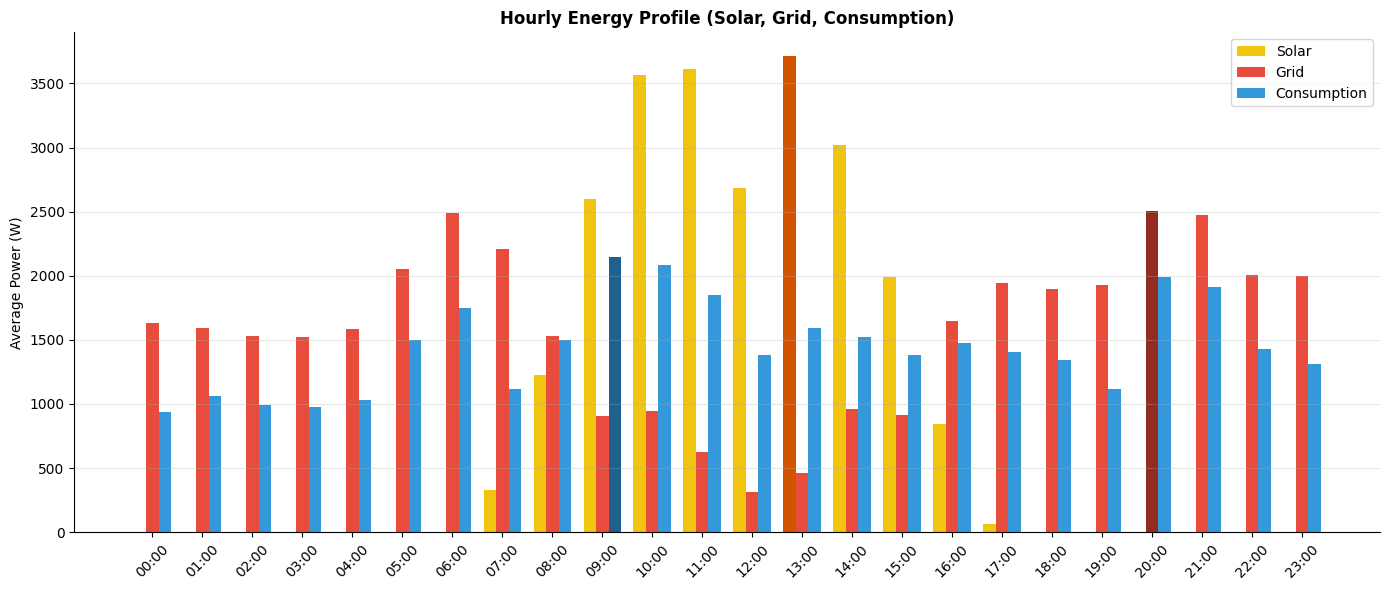

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data['Updated Time'] = pd.to_datetime(data['Updated Time'])
data['Hour'] = data['Updated Time'].dt.hour

hourly = pd.DataFrame({
    'Solar': data.groupby('Hour')['Production Power(W)'].mean(),
    'Grid': data[data['Grid Power(W)'] > 0].groupby('Hour')['Grid Power(W)'].mean(),
    'Consumption': data.groupby('Hour')['Consumption Power(W)'].mean()
}).fillna(0)

fig, ax = plt.subplots(figsize=(14,6))
x = np.arange(len(hourly))
width = 0.25

def highlight_max(values, base_color, highlight_color):
    max_idx = values.idxmax()
    colors = [base_color] * len(values)
    colors[list(values.index).index(max_idx)] = highlight_color
    return colors

ax.bar(x - width, hourly['Solar'], width,
       color=highlight_max(hourly['Solar'], '#f1c40f', '#d35400'),
       label='Solar')

ax.bar(x, hourly['Grid'], width,
       color=highlight_max(hourly['Grid'], '#e74c3c', '#922b21'),
       label='Grid')

ax.bar(x + width, hourly['Consumption'], width,
       color=highlight_max(hourly['Consumption'], '#3498db', '#1f618d'),
       label='Consumption')

ax.set_xticks(x)
ax.set_xticklabels([f'{h:02d}:00' for h in hourly.index], rotation=45)
ax.set_ylabel('Average Power (W)')
ax.set_title('Hourly Energy Profile (Solar, Grid, Consumption)', fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


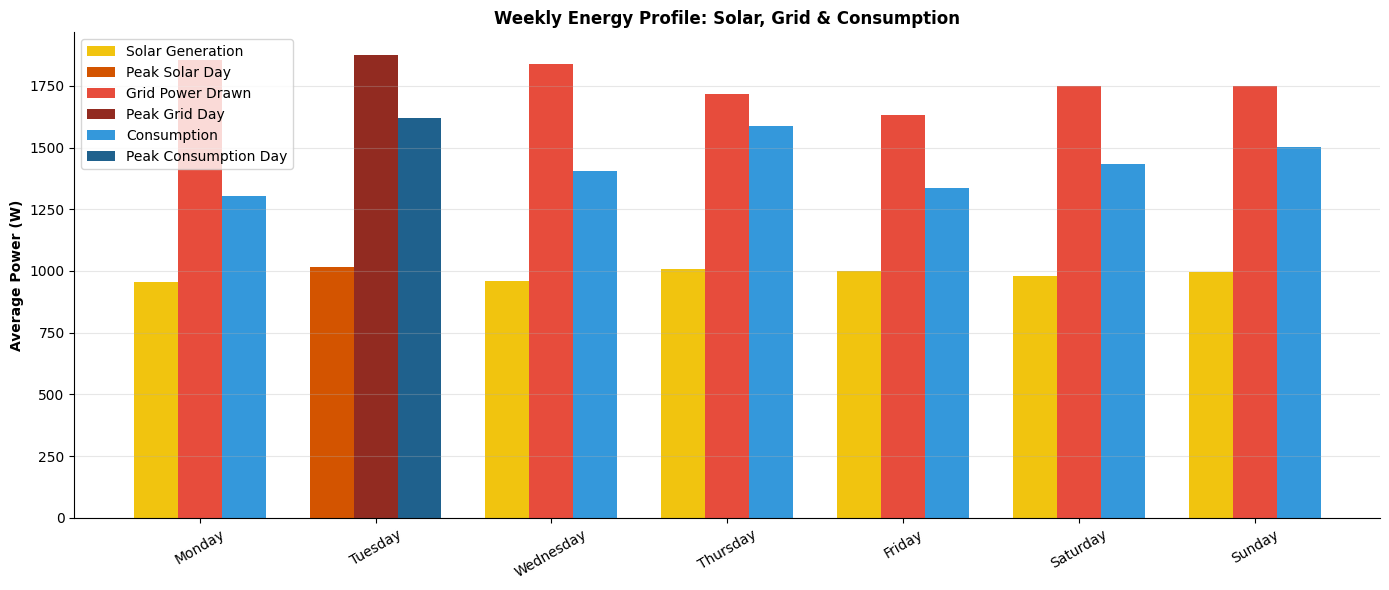

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Time processing
data['Updated Time'] = pd.to_datetime(data['Updated Time'])
data['Day'] = data['Updated Time'].dt.day_name()

# Optional: keep days in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Average power per day (for one week or entire dataset)
daily = pd.DataFrame({
    'Solar': data.groupby('Day')['Production Power(W)'].mean(),
    'Grid': data[data['Grid Power(W)'] > 0].groupby('Day')['Grid Power(W)'].mean(),
    'Consumption': data.groupby('Day')['Consumption Power(W)'].mean()
}).reindex(day_order).fillna(0)

fig, ax = plt.subplots(figsize=(14,6))
x = np.arange(len(daily))
width = 0.25

# Highlight peak values
def highlight_max(values, base_color, peak_color):
    colors = [base_color] * len(values)
    colors[list(values.index).index(values.idxmax())] = peak_color
    return colors

# Plot bars
ax.bar(
    x - width, daily['Solar'], width,
    color=highlight_max(daily['Solar'], '#f1c40f', '#d35400'),
    label='Solar Generation'
)

ax.bar(
    x, daily['Grid'], width,
    color=highlight_max(daily['Grid'], '#e74c3c', '#922b21'),
    label='Grid Power Drawn'
)

ax.bar(
    x + width, daily['Consumption'], width,
    color=highlight_max(daily['Consumption'], '#3498db', '#1f618d'),
    label='Consumption'
)

# Axes formatting
ax.set_xticks(x)
ax.set_xticklabels(daily.index, rotation=30)
ax.set_ylabel('Average Power (W)', fontweight='bold')
ax.set_title('Weekly Energy Profile: Solar, Grid & Consumption', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend
legend_elements = [
    Patch(facecolor='#f1c40f', label='Solar Generation'),
    Patch(facecolor='#d35400', label='Peak Solar Day'),
    Patch(facecolor='#e74c3c', label='Grid Power Drawn'),
    Patch(facecolor='#922b21', label='Peak Grid Day'),
    Patch(facecolor='#3498db', label='Consumption'),
    Patch(facecolor='#1f618d', label='Peak Consumption Day')
]

ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()


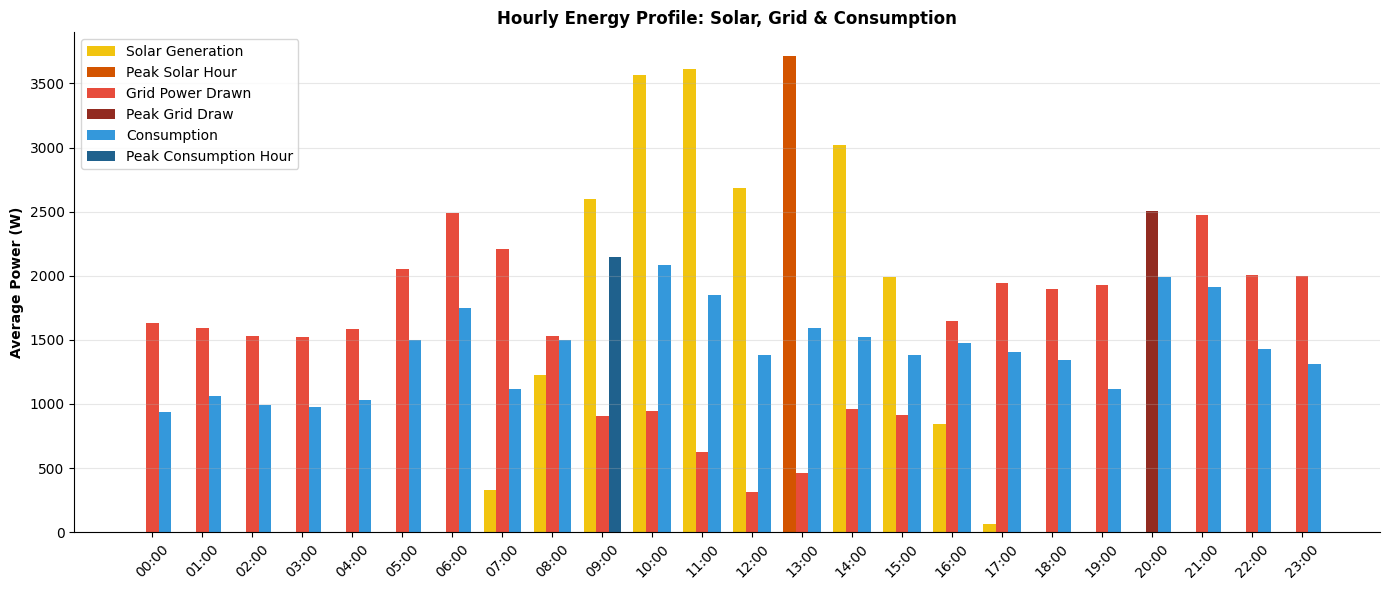

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Time processing
data['Updated Time'] = pd.to_datetime(data['Updated Time'])
data['Hour'] = data['Updated Time'].dt.hour

# Hourly averages
hourly = pd.DataFrame({
    'Solar': data.groupby('Hour')['Production Power(W)'].mean(),
    'Grid': data[data['Grid Power(W)'] > 0].groupby('Hour')['Grid Power(W)'].mean(),
    'Consumption': data.groupby('Hour')['Consumption Power(W)'].mean()
}).fillna(0)

fig, ax = plt.subplots(figsize=(14,6))
x = np.arange(len(hourly))
width = 0.25

# Highlight peak values
def highlight_max(values, base_color, peak_color):
    colors = [base_color] * len(values)
    colors[list(values.index).index(values.idxmax())] = peak_color
    return colors

# Plot bars
ax.bar(
    x - width, hourly['Solar'], width,
    color=highlight_max(hourly['Solar'], '#f1c40f', '#d35400'),
    label='Solar Generation'
)

ax.bar(
    x, hourly['Grid'], width,
    color=highlight_max(hourly['Grid'], '#e74c3c', '#922b21'),
    label='Grid Power Drawn'
)

ax.bar(
    x + width, hourly['Consumption'], width,
    color=highlight_max(hourly['Consumption'], '#3498db', '#1f618d'),
    label='Consumption'
)

# Axes formatting
ax.set_xticks(x)
ax.set_xticklabels([f'{h:02d}:00' for h in hourly.index], rotation=45)
ax.set_ylabel('Average Power (W)', fontweight='bold')
ax.set_title('Hourly Energy Profile: Solar, Grid & Consumption', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Custom legend (clear meaning)
legend_elements = [
    Patch(facecolor='#f1c40f', label='Solar Generation'),
    Patch(facecolor='#d35400', label='Peak Solar Hour'),
    Patch(facecolor='#e74c3c', label='Grid Power Drawn'),
    Patch(facecolor='#922b21', label='Peak Grid Draw'),
    Patch(facecolor='#3498db', label='Consumption'),
    Patch(facecolor='#1f618d', label='Peak Consumption Hour')
]

ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()


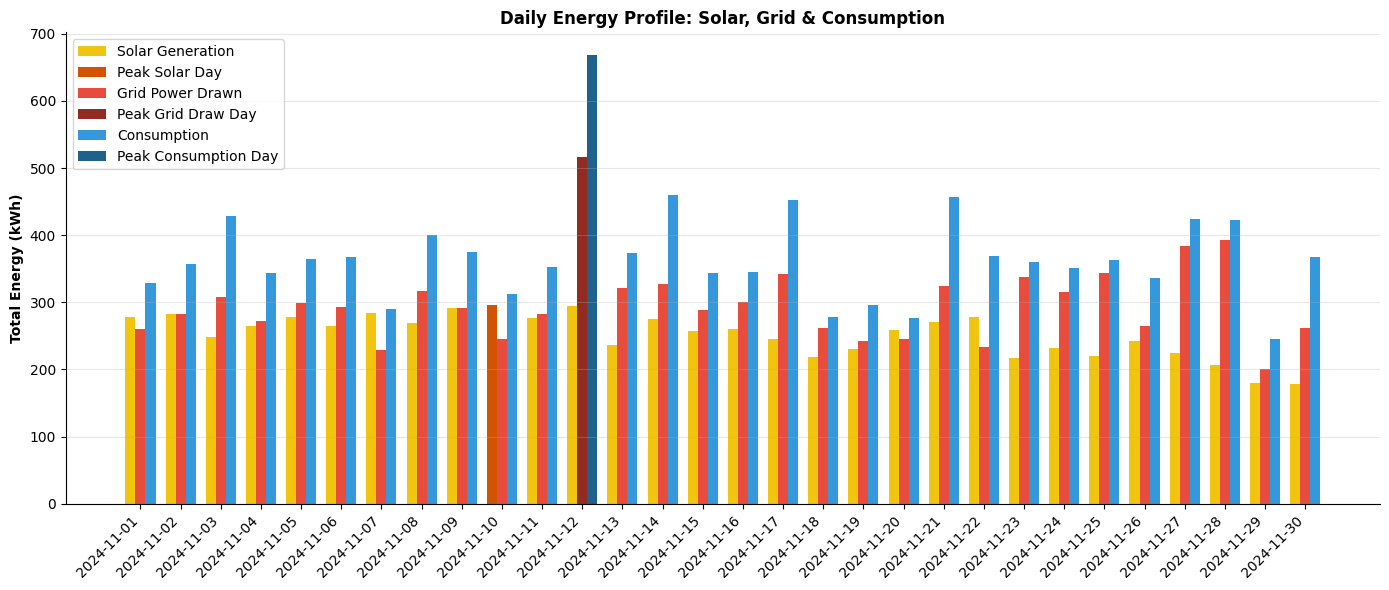

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Time processing
data['Updated Time'] = pd.to_datetime(data['Updated Time'])
data['Date'] = data['Updated Time'].dt.date

# Daily totals (converted from W to kWh)
# Assuming each reading represents power over a time interval
# If readings are every X minutes, you'd multiply by (X/60) to get kWh
# For now, summing and converting: Sum of W readings / 1000 gives approximate kWh

daily = pd.DataFrame({
    'Solar': data.groupby('Date')['Production Power(W)'].sum() / 1000,  # Convert to kWh
    'Grid': data[data['Grid Power(W)'] > 0].groupby('Date')['Grid Power(W)'].sum() / 1000,
    'Consumption': data.groupby('Date')['Consumption Power(W)'].sum() / 1000
}).fillna(0)

fig, ax = plt.subplots(figsize=(14,6))
x = np.arange(len(daily))
width = 0.25

# Highlight peak values
def highlight_max(values, base_color, peak_color):
    colors = [base_color] * len(values)
    if len(values) > 0:
        colors[list(values.index).index(values.idxmax())] = peak_color
    return colors

# Plot bars
ax.bar(
    x - width, daily['Solar'], width,
    color=highlight_max(daily['Solar'], '#f1c40f', '#d35400'),
    label='Solar Generation'
)

ax.bar(
    x, daily['Grid'], width,
    color=highlight_max(daily['Grid'], '#e74c3c', '#922b21'),
    label='Grid Power Drawn'
)

ax.bar(
    x + width, daily['Consumption'], width,
    color=highlight_max(daily['Consumption'], '#3498db', '#1f618d'),
    label='Consumption'
)

# Axes formatting
ax.set_xticks(x)
ax.set_xticklabels([str(d) for d in daily.index], rotation=45, ha='right')
ax.set_ylabel('Total Energy (kWh)', fontweight='bold')
ax.set_title('Daily Energy Profile: Solar, Grid & Consumption', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Custom legend
legend_elements = [
    Patch(facecolor='#f1c40f', label='Solar Generation'),
    Patch(facecolor='#d35400', label='Peak Solar Day'),
    Patch(facecolor='#e74c3c', label='Grid Power Drawn'),
    Patch(facecolor='#922b21', label='Peak Grid Draw Day'),
    Patch(facecolor='#3498db', label='Consumption'),
    Patch(facecolor='#1f618d', label='Peak Consumption Day')
]

ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

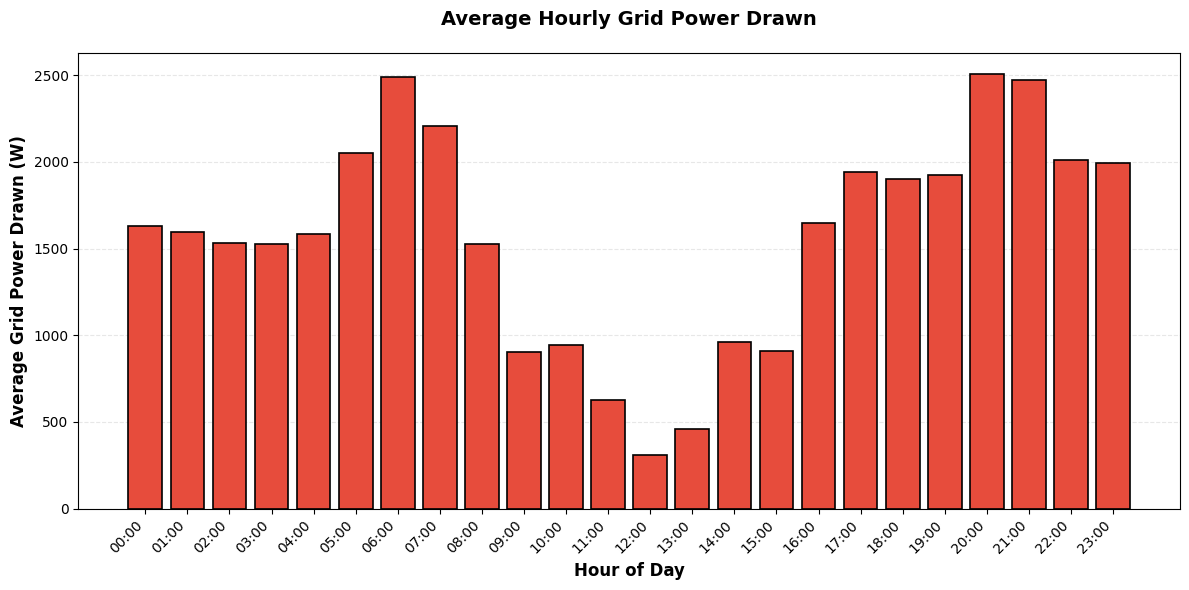


=== Grid Power Drawn Summary ===
 Hour  Grid Power(W)
    0    1631.544118
    1    1594.464052
    2    1532.314935
    3    1525.006270
    4    1586.968847
    5    2052.115987
    6    2489.421053
    7    2206.000000
    8    1528.226766
    9     905.043243
   10     945.146341
   11     625.537037
   12     310.916667
   13     458.033333
   14     959.698795
   15     912.037838
   16    1646.673016
   17    1941.610063
   18    1899.197719
   19    1924.602273
   20    2504.515528
   21    2474.465409
   22    2009.260317
   23    1995.071111

Peak Grid Draw Hour: 20:00 with 2504.52 W


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Updated Time' to datetime
data['Updated Time'] = pd.to_datetime(data['Updated Time'])

# Extract hour
data['Hour'] = data['Updated Time'].dt.hour

# Keep only grid power drawn (positive values)
grid_drawn = data[data['Grid Power(W)'] > 0]

# Calculate average grid power drawn per hour
hourly_avg_grid = (
    grid_drawn.groupby('Hour')['Grid Power(W)']
    .mean()
    .reset_index()
)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(
    hourly_avg_grid['Hour'],
    hourly_avg_grid['Grid Power(W)'],
    color='#e74c3c',
    edgecolor='black',
    linewidth=1.2
)

# Labels and title
ax.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Grid Power Drawn (W)', fontsize=12, fontweight='bold')
ax.set_title(
    'Average Hourly Grid Power Drawn',
    fontsize=14,
    fontweight='bold',
    pad=20
)

ax.set_xticks(hourly_avg_grid['Hour'])
ax.set_xticklabels(
    [f'{h:02d}:00' for h in hourly_avg_grid['Hour']],
    rotation=45,
    ha='right'
)

# Grid styling
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== Grid Power Drawn Summary ===")
print(hourly_avg_grid.to_string(index=False))

peak_hour = hourly_avg_grid.loc[
    hourly_avg_grid['Grid Power(W)'].idxmax(), 'Hour'
]
peak_power = hourly_avg_grid['Grid Power(W)'].max()

print(
    f"\nPeak Grid Draw Hour: {peak_hour:02d}:00 "
    f"with {peak_power:.2f} W"
)


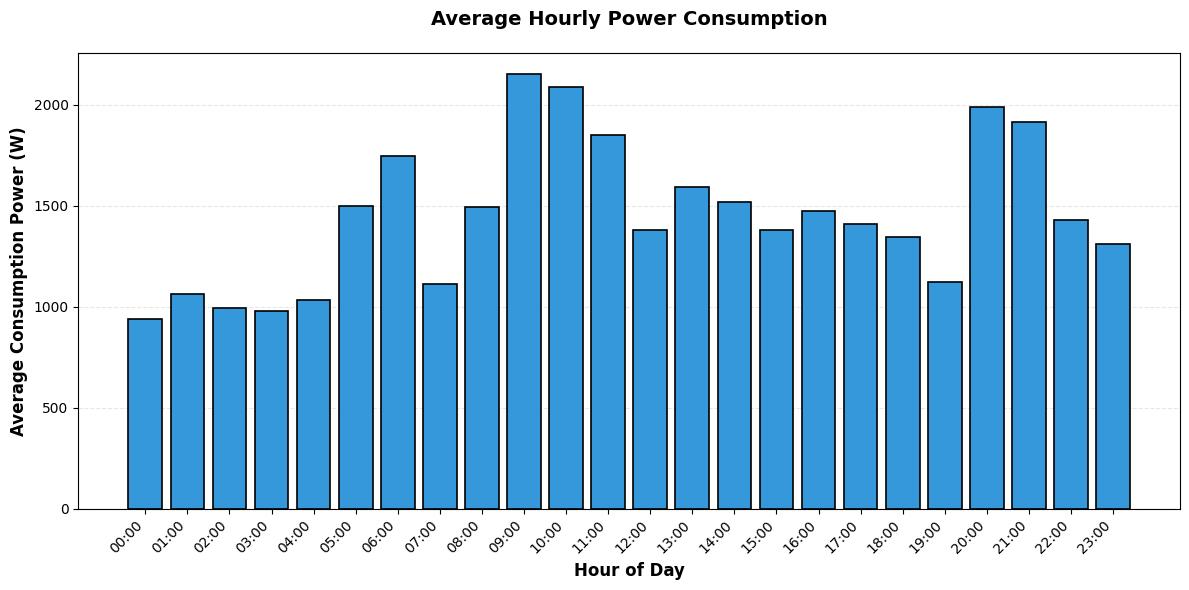


=== Consumption Power Summary ===
 Hour  Consumption Power(W)
    0            937.550633
    1           1064.918495
    2            993.719626
    3            977.990654
    4           1033.168224
    5           1497.639752
    6           1748.347003
    7           1114.821656
    8           1495.875776
    9           2149.899371
   10           2085.590625
   11           1848.003135
   12           1381.690096
   13           1592.993808
   14           1518.690625
   15           1381.546875
   16           1472.898148
   17           1407.401254
   18           1343.079365
   19           1120.342105
   20           1990.956522
   21           1915.125000
   22           1430.300310
   23           1310.779180

Peak Consumption Hour: 09:00 with 2149.90 W


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Updated Time' to datetime
data['Updated Time'] = pd.to_datetime(data['Updated Time'])

# Extract hour
data['Hour'] = data['Updated Time'].dt.hour

# Calculate average consumption power per hour
hourly_avg_consumption = (
    data.groupby('Hour')['Consumption Power(W)']
    .mean()
    .reset_index()
)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(
    hourly_avg_consumption['Hour'],
    hourly_avg_consumption['Consumption Power(W)'],
    color='#3498db',
    edgecolor='black',
    linewidth=1.2
)

# Labels and title
ax.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Consumption Power (W)', fontsize=12, fontweight='bold')
ax.set_title(
    'Average Hourly Power Consumption',
    fontsize=14,
    fontweight='bold',
    pad=20
)

ax.set_xticks(hourly_avg_consumption['Hour'])
ax.set_xticklabels(
    [f'{h:02d}:00' for h in hourly_avg_consumption['Hour']],
    rotation=45,
    ha='right'
)

# Grid styling
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== Consumption Power Summary ===")
print(hourly_avg_consumption.to_string(index=False))

peak_hour = hourly_avg_consumption.loc[
    hourly_avg_consumption['Consumption Power(W)'].idxmax(), 'Hour'
]
peak_power = hourly_avg_consumption['Consumption Power(W)'].max()

print(
    f"\nPeak Consumption Hour: {peak_hour:02d}:00 "
    f"with {peak_power:.2f} W"
)


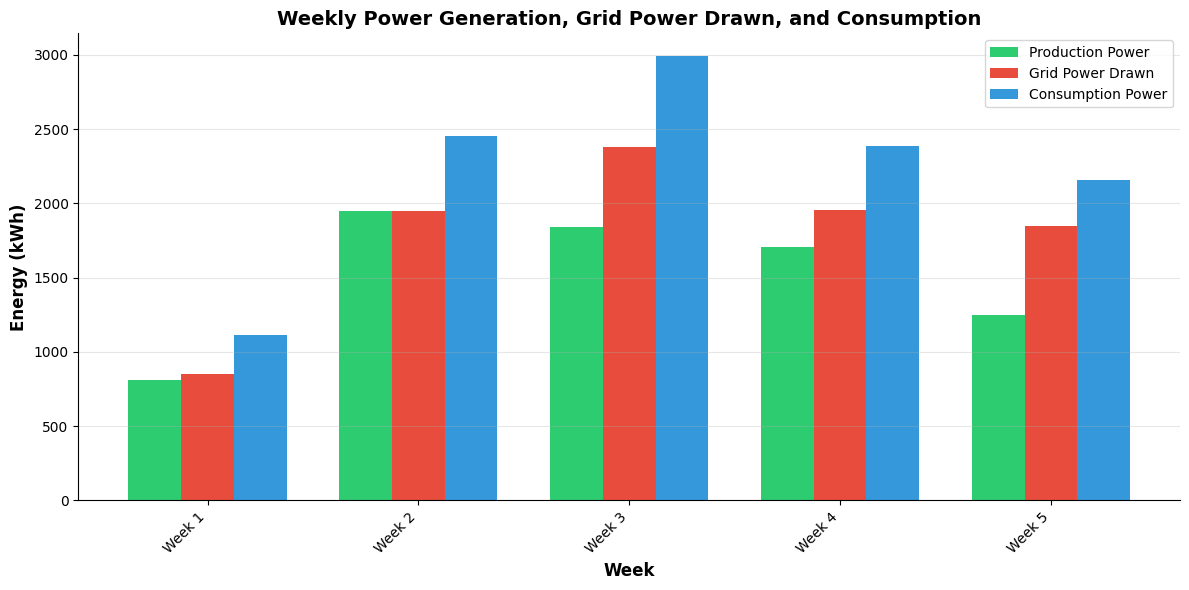


Weekly Summary Statistics:
        Production Power (kWh)  Consumption Power (kWh)  \
Week 1                 809.509                 1115.125   
Week 2                1946.582                 2451.597   
Week 3                1844.655                 2995.653   
Week 4                1703.894                 2384.211   
Week 5                1250.144                 2159.065   

        Grid Power Drawn (kWh)  
Week 1                 849.968  
Week 2                1947.846  
Week 3                2377.732  
Week 4                1958.338  
Week 5                1847.511  


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Updated Time' to datetime
data['Updated Time'] = pd.to_datetime(data['Updated Time'])

# Set 'Updated Time' as index
data_indexed = data.set_index('Updated Time')

# Create a week column for grouping
data_indexed['Week'] = data_indexed.index.to_period('W')

# Calculate weekly aggregations
weekly_data = pd.DataFrame({
    'Production Power (kWh)': data_indexed.groupby('Week')['Production Power(W)'].sum() / 1000,  # Convert W to kWh
    'Consumption Power (kWh)': data_indexed.groupby('Week')['Consumption Power(W)'].sum() / 1000,
    'Grid Power Drawn (kWh)': data_indexed.groupby('Week')['Grid Power(W)'].apply(lambda x: x[x > 0].sum()) / 1000  # Only positive values (drawn from grid)
})

# Create custom week labels (Week 1, Week 2, etc.)
week_labels = [f'Week {i+1}' for i in range(len(weekly_data))]

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(weekly_data))
width = 0.25

bars1 = ax.bar(x - width, weekly_data['Production Power (kWh)'], width, label='Production Power', color='#2ecc71')
bars2 = ax.bar(x, weekly_data['Grid Power Drawn (kWh)'], width, label='Grid Power Drawn', color='#e74c3c')
bars3 = ax.bar(x + width, weekly_data['Consumption Power (kWh)'], width, label='Consumption Power', color='#3498db')

# Customize the chart
ax.set_xlabel('Week', fontsize=12, fontweight='bold')
ax.set_ylabel('Energy (kWh)', fontsize=12, fontweight='bold')
ax.set_title('Weekly Power Generation, Grid Power Drawn, and Consumption', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(week_labels, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Display summary statistics
print("\nWeekly Summary Statistics:")
weekly_data.index = week_labels
print(weekly_data)

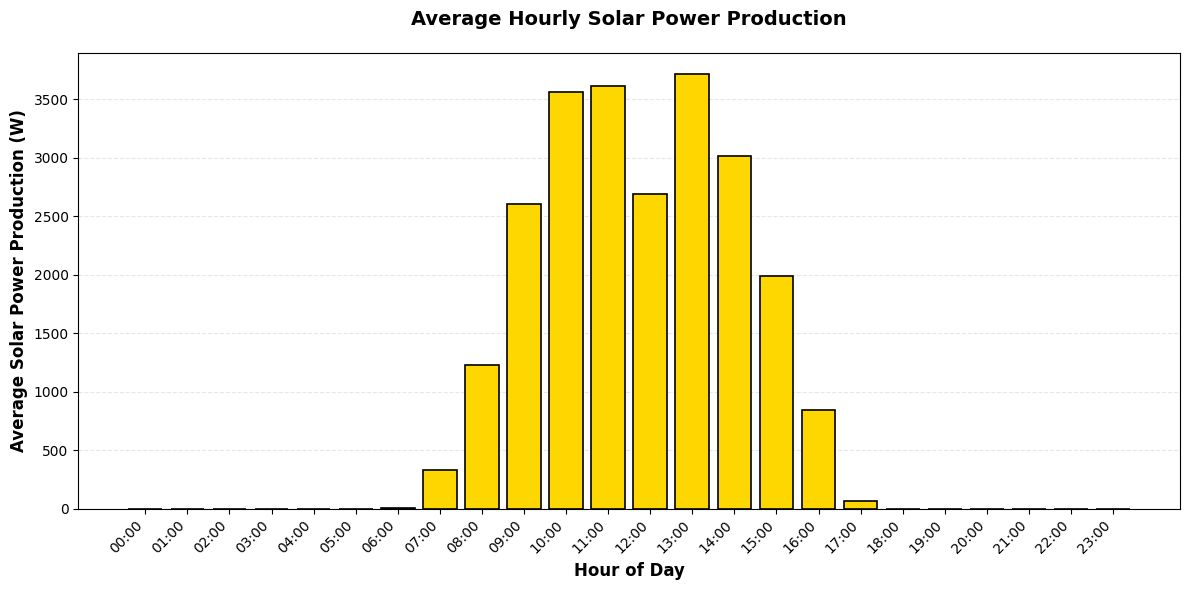


=== Solar Power Production Summary ===
 Hour  Production Power(W)
    0             0.000000
    1             0.000000
    2             0.000000
    3             0.000000
    4             0.000000
    5             0.000000
    6             2.066246
    7           326.700637
    8          1225.118012
    9          2602.135220
   10          3565.637500
   11          3614.144201
   12          2687.523962
   13          3712.597523
   14          3015.765625
   15          1988.831250
   16           845.907407
   17            61.921630
   18             0.000000
   19             0.000000
   20             0.000000
   21             0.000000
   22             0.000000
   23             0.000000

Peak Production Hour: 13:00 with 3712.60 W


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Updated Time' to datetime format
data['Updated Time'] = pd.to_datetime(data['Updated Time'])

# Extract hour from the datetime
data['Hour'] = data['Updated Time'].dt.hour

# Calculate average production power for each hour
hourly_avg_production = data.groupby('Hour')['Production Power(W)'].mean().reset_index()

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(hourly_avg_production['Hour'], 
              hourly_avg_production['Production Power(W)'], 
              color='#FFD700', edgecolor='black', linewidth=1.2)

# Labels and title
ax.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Solar Power Production (W)', fontsize=12, fontweight='bold')
ax.set_title('Average Hourly Solar Power Production', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(hourly_avg_production['Hour'])
ax.set_xticklabels([f'{h:02d}:00' for h in hourly_avg_production['Hour']], 
                    rotation=45, ha='right')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Solar Power Production Summary ===")
print(hourly_avg_production.to_string(index=False))
peak_hour = hourly_avg_production.loc[hourly_avg_production['Production Power(W)'].idxmax(), 'Hour']
peak_power = hourly_avg_production['Production Power(W)'].max()
print(f"\nPeak Production Hour: {peak_hour:02d}:00 with {peak_power:.2f} W")

In [6]:
data.nunique()

Plant Name                 1
Updated Time            7650
Time Zone                  1
Production Power(W)     2367
Consumption Power(W)    2630
Grid Power(W)           3481
Purchasing Power(W)     2498
Feed-in Power(W)         983
Battery Power(W)        1628
SoC(%)                    89
Hour                      24
Day                        7
dtype: int64

In [25]:
data.dropna()

,Plant Name,Updated Time,Time Zone,Production Power(W),Consumption Power(W),Grid Power(W),Purchasing Power(W),Feed-in Power(W),Battery Power(W),Charging Power(W),Discharging Power(W),SoC(%)


In [4]:
data.to_csv('November2024_clean.csv', index=False)

In [20]:
data.isnull().sum()

Plant Name              0
Updated Time            0
Time Zone               0
Production Power(W)     0
Consumption Power(W)    0
Grid Power(W)           0
Battery Power(W)        0
SoC(%)                  0
dtype: int64

In [21]:
data.shape

(7650, 8)

In [3]:
data.columns

Index(['Plant Name', 'Updated Time', 'Time Zone', 'Production Power(W)',
       'Consumption Power(W)', 'Grid Power(W)', 'Purchasing Power(W)',
       'Feed-in Power(W)', 'Battery Power(W)', 'Charging Power(W)',
       'Discharging Power(W)', 'SoC(%)'],
      dtype='object')